<a href="https://colab.research.google.com/github/Ragav5108/Datascience_internship/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# -----------------------------------------------
# 📘 STEP 1: Import Libraries
# -----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# -----------------------------------------------
# 📂 STEP 2: Load Dataset
# -----------------------------------------------
# Example: Twitter US Airline Sentiment dataset
# Download from https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
df = pd.read_csv("/content/drive/MyDrive/Tweets.csv")

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

/tmp/ipython-input-2059910366.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='Set2')


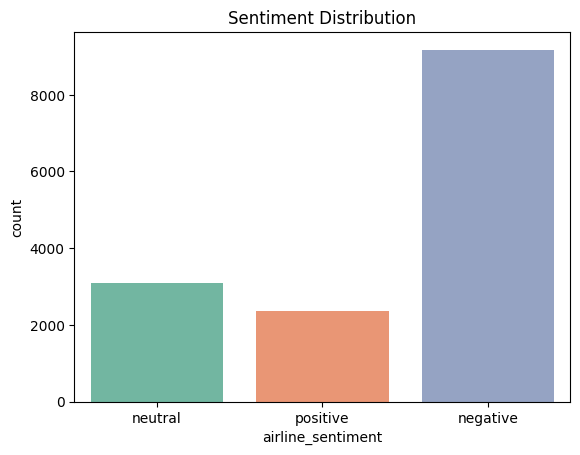

In [4]:
# -----------------------------------------------
# 📊 STEP 3: Explore Data
# -----------------------------------------------
print(df.head())
print(df['airline_sentiment'].value_counts())

sns.countplot(x='airline_sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.show()

# Rename columns for simplicity
df = df[['text', 'airline_sentiment']]
df.columns = ['tweet', 'sentiment']

In [5]:
# -----------------------------------------------
# 🧹 STEP 4: Data Cleaning Function
# -----------------------------------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)            # Remove URLs
    text = re.sub(r'@\w+', '', text)               # Remove mentions
    text = re.sub(r'#', '', text)                  # Remove hashtags symbol
    text = re.sub(r'[^\w\s]', '', text)            # Remove punctuation
    text = re.sub(r'\d+', '', text)                # Remove numbers
    text = text.strip()
    return text

df['clean_tweet'] = df['tweet'].apply(clean_text)

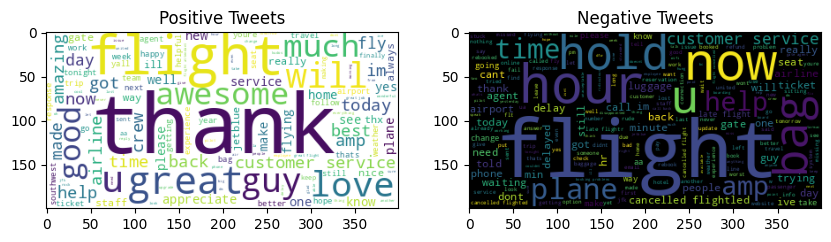

In [6]:
# -----------------------------------------------
# ☁️ STEP 5: WordCloud Visualization
# -----------------------------------------------
positive_text = " ".join(df[df['sentiment']=='positive']['clean_tweet'])
negative_text = " ".join(df[df['sentiment']=='negative']['clean_tweet'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=200, background_color='white').generate(positive_text))
plt.title("Positive Tweets")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=200, background_color='black').generate(negative_text))
plt.title("Negative Tweets")
plt.show()

In [7]:
# -----------------------------------------------
# 🔠 STEP 6: Feature Extraction (TF-IDF)
# -----------------------------------------------
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['clean_tweet']).toarray()
y = df['sentiment']

# Encode labels if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)   # positive=2, neutral=1, negative=0 (depends on dataset)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# -----------------------------------------------
# 🤖 STEP 7: Model Training
# -----------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.7657
Naive Bayes Accuracy: 0.7234
Random Forest Accuracy: 0.7592



Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      1835
     neutral       0.62      0.42      0.50       620
    positive       0.82      0.53      0.64       473

    accuracy                           0.77      2928
   macro avg       0.74      0.63      0.67      2928
weighted avg       0.76      0.77      0.75      2928



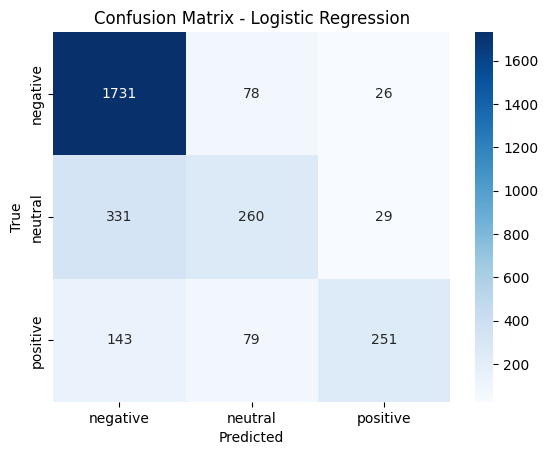

In [10]:
# -----------------------------------------------
# 📈 STEP 8: Evaluation
# -----------------------------------------------
best_model = LogisticRegression(max_iter=200)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [15]:
# -----------------------------------------------
# 🧩 STEP 9: Test with Custom Tweet
# -----------------------------------------------
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    pred = best_model.predict(vec)[0]
    sentiment = le.inverse_transform([pred])[0]
    return sentiment

sample = "I absolutely love the new service by the airline!"
print("Tweet:", sample)
print("Predicted Sentiment:", predict_sentiment(sample))

Tweet: I absolutely love the new service by the airline!
Predicted Sentiment: positive


In [17]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.6 MB/s eta 0:00:00


In [18]:
%%writefile app.py
import streamlit as st
import re
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# --- Simple model simulation (for demo) ---
# You can replace this with your trained model & vectorizer
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|@\w+|[^a-z\s]', '', text)
    return text

def predict_sentiment(text):
    # Dummy rule-based sentiment for demo
    if any(word in text.lower() for word in ["good", "great", "happy", "love"]):
        return "Positive"
    elif any(word in text.lower() for word in ["bad", "hate", "worst", "sad"]):
        return "Negative"
    else:
        return "Neutral"

# --- Streamlit UI ---
st.title("Twitter Sentiment Analysis App")
tweet = st.text_area("Enter a tweet:")
if st.button("Analyze"):
    sentiment = predict_sentiment(tweet)
    st.success(f"Predicted Sentiment: {sentiment}")

Writing app.py


In [23]:
from pyngrok import ngrok
!streamlit run app.py &>/dev/null&  # start Streamlit in background
public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "https://nonactinically-unforetold-meg.ngrok-free.dev" -> "http://localhost:8501">

In [21]:

!pip install pyngrok
from pyngrok import ngrok

# Paste your authtoken below (replace YOUR_TOKEN_HERE)
!ngrok config add-authtoken 34jGG3biQNqRapjexD5Ogy9vB4Q_5icmVLpLtk1Z2WSVmzkbC

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
